### Midterm Practice
*   Part I: Lectures 1 - 8 
*   Part II: Lectures 9 - 10 (see Notebook: Midterm Review -- Lectures 9-10)

_Includes some homework questions, pop quizzes, and quizzes_

#### _Part I:_
*   _Image Formation_
*   _Image Filtering_
*   _Edge Detection_
*   _Corner Detection_
*   _Blob Detection_
*   _SIFT Detection_
*   _Image Transformation & Stitching_

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [65]:
# Directory Paths for Images

hw1 = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Homework/COE49413_HW1'
data = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Computer-Vision-Repository/midterm prep/data/images'

Exercise 1: In the August of 1999, Japan decided to re-design its flag. The circle color was changed from #B0313F color to #BC002D color. Apply the neccessary changes and show the flag before and after it was redesigned.

(-0.5, 382.5, 199.5, -0.5)

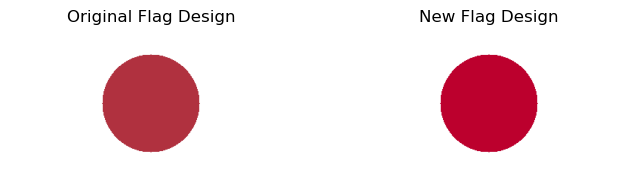

In [19]:
originalFlag = cv2.imread(os.path.join(hw1, 'Q1', 'japan_flag.png'))        # image read in BGR format
newFlag = originalFlag.copy()

originalFlagColor = np.array([63, 49, 176])                                 # B0313F Color
newFlagColor = np.array([45, 0, 188])                                       # BC002D Color

# we want to identify the pixels corresponding to the circle in the original flag so that we can change them
identifiedPixels = cv2.inRange(originalFlag, lowerb = originalFlagColor, upperb = originalFlagColor)            
                                                                            # upper &  lower bound are the same as we only want to detect one color
newFlag[identifiedPixels > 0] = newFlagColor                                # identified pixels within the range will have a value of 255
                                                                            # replace those pixels with the new color

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(originalFlag, cv2.COLOR_BGR2RGB))
plt.title('Original Flag Design')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(newFlag, cv2.COLOR_BGR2RGB))
plt.title('New Flag Design')
plt.axis('off')

Exercise 2: After hearing that Aokigahara Forest in Japan is a weird place, your curiosity pushes you into googling how it looks like. However, the image that you find (forest.jpg) seems too fascinating to be true. Find the issue in this image and fix it.

(-0.5, 999.5, 666.5, -0.5)

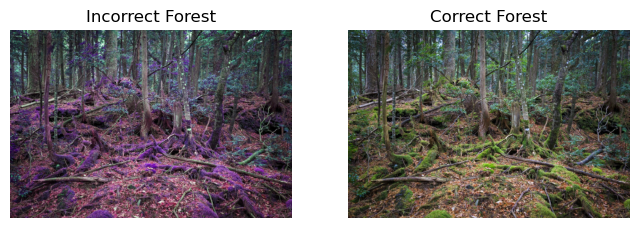

In [24]:
incorrectForest = cv2.imread(os.path.join(hw1, 'Q1', 'forest.jpg'))             # it looks like the color channels may be switched
                                                                                # what should be brown/green is purple/pink
blue, green, red = cv2.split(incorrectForest)

# swap the blue and green channels
correctForest = cv2.merge([green, blue, red])

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(incorrectForest, cv2.COLOR_BGR2RGB))
plt.title('Incorrect Forest')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(correctForest, cv2.COLOR_BGR2RGB))
plt.title('Correct Forest')
plt.axis('off')

Exercise 3: The Shawshank Redemption is my favorite movie. However, my TV is too old now and I cannot see things clearly. Can you fix my TV? I left a frame of the movie for you to have a look (shawshank.png)

(-0.5, 749.5, 421.5, -0.5)

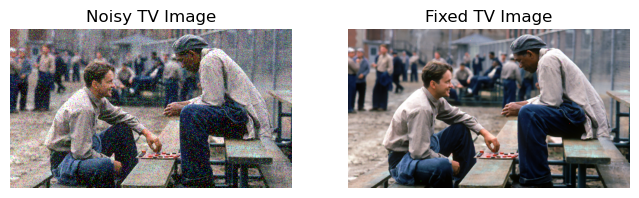

In [45]:
TVWithNoise = cv2.imread(os.path.join(hw1, 'Q2', 'shawshank.png'))          # image contains salt-and-pepper noise
                                                                            # hence, we need to apply a Median Filter
fixedTV = cv2.medianBlur(TVWithNoise, ksize = 3)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(TVWithNoise, cv2.COLOR_BGR2RGB))
plt.title('Noisy TV Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(fixedTV, cv2.COLOR_BGR2RGB))
plt.title('Fixed TV Image')
plt.axis('off')

Exercise 4: MNIST is a hand-written digits dataset. Sharpen the image obtained above by applying an appropriate kernel and show your results.

(-0.5, 1489.5, 1479.5, -0.5)

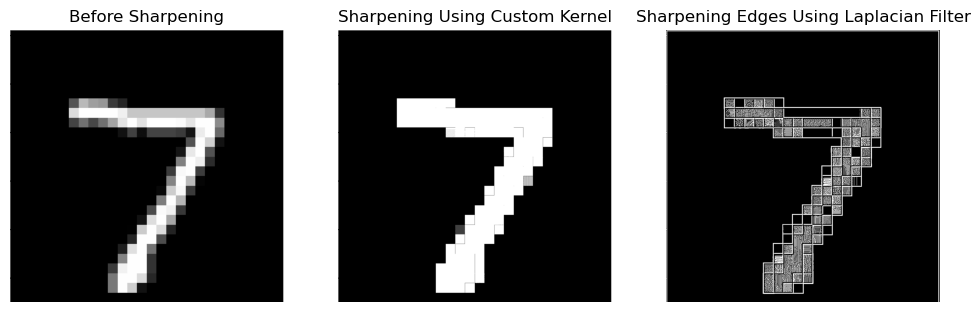

In [62]:
digit = cv2.imread('C:/Users/user/Downloads/sample_mnist_image.png')        # we need to sharpen the image, either using a custom kernel
                                                                            # or we can also try Laplacian Filter to sharpen the edges

# Custom Kernel -- to sharpen the image we need to highlight the pixels that outline the digit and suppress the rest
#                  we can achieve this by giving the center value of the filter a high positive number and the remaining a negative number
sharpenKernel = np.array([
    [-1, -1, -1],
    [-1, 20, -1],
    [-1, -1, -1]
])

sharpenedDigit = cv2.filter2D(digit, ddepth = cv2.CV_32F, kernel = sharpenKernel)
sharpenedDigit = np.clip(sharpenedDigit, a_min = 0, a_max = 1).astype(np.float32)

# Laplacian Filter (experimentation)
digitFiltered = cv2.Laplacian(digit, ddepth = cv2.CV_32F, ksize = 11)
digitFiltered = np.clip(digitFiltered, a_min = 0, a_max = 1).astype(np.float32)

plt.figure(figsize = (12, 12))

plt.subplot(1, 3, 1)
plt.imshow(digit, cmap = 'gray')
plt.title('Before Sharpening')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpenedDigit, cmap = 'gray')
plt.title('Sharpening Using Custom Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(digitFiltered, cmap = 'gray')
plt.title('Sharpening Edges Using Laplacian Filter')
plt.axis('off')

Exercise 5: Examine the use of sobel x and y derivatives for edge detection and compare them to canny edge detector on the image provided (butterfly.jpg)

(-0.5, 492.5, 355.5, -0.5)

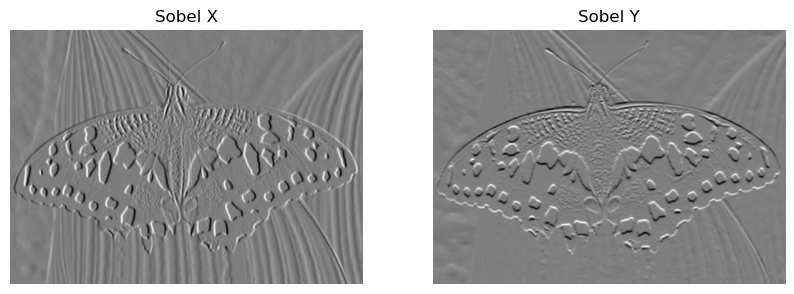

In [82]:
butterfly = cv2.imread(os.path.join(data, 'butterfly.jpg'), cv2.IMREAD_GRAYSCALE)

# Edge Detection Using Sobel
sobelX = cv2.Sobel(butterfly, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 5)
sobelY = cv2.Sobel(butterfly, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = 5)
magnitude = np.sqrt(sobelX ** 2 + sobelY ** 2)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobelX, cmap = 'gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobelY, cmap = 'gray')
plt.title('Sobel Y')
plt.axis('off')

In [91]:
# Edge Detection Using Canny Edge Detector
edgesCanny = cv2.Canny(butterfly, threshold1 = 80, threshold2 = 120)        # experiment around with the thresholds
                                                                            # interpretation:
                                                                            # magnitudes > 120 are considered strong edges
                                                                            # 80 < magnitudes < 120 are considered weak edges
                                                                            # magnitudes < 80 are considered noise

(-0.5, 492.5, 355.5, -0.5)

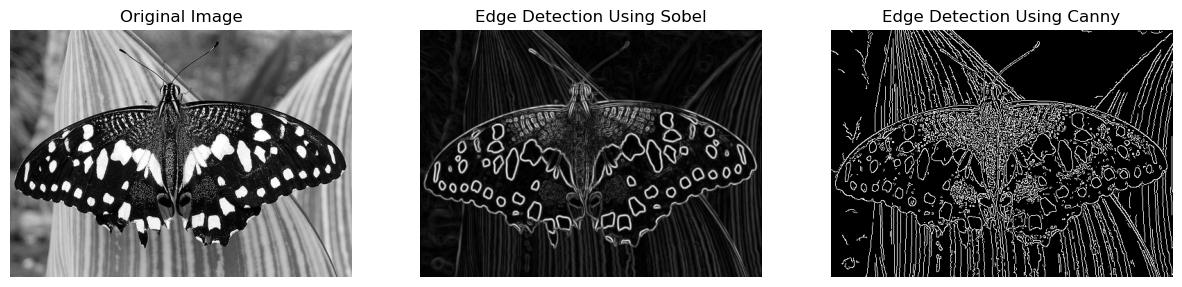

In [92]:
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.imshow(butterfly, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Edge Detection Using Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edgesCanny, cmap = 'gray')
plt.title('Edge Detection Using Canny')
plt.axis('off')

(-0.5, 492.5, 355.5, -0.5)

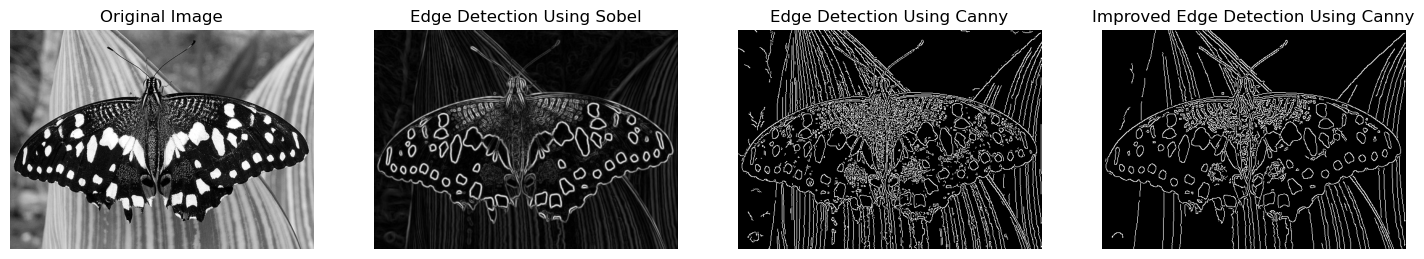

In [98]:
# We can improve the Canny Edge Detection by adding our own blur to the image and playing around with the thresholds. 
# We will set the lower threshold to be the maximum of 0 and 70% of the median value of the image. 
# On the other hand, we will set the upper threshold to be the minimum of 255 and 1.3 times the median value of the image.

butterflyBlurred = cv2.GaussianBlur(butterfly, ksize = (3, 3), sigmaX = 3, sigmaY = 3)

median = np.median(butterfly)
lower_threshold = int(max(0, 0.7 * median))
upper_threshold = int(min(255, 1.3 * median))

edgesCanny2 = cv2.Canny(butterflyBlurred, lower_threshold, upper_threshold)

plt.figure(figsize = (18, 18))
plt.subplot(1, 4, 1)
plt.imshow(butterfly, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Edge Detection Using Sobel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edgesCanny, cmap = 'gray')
plt.title('Edge Detection Using Canny')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edgesCanny2, cmap = 'gray')
plt.title('Improved Edge Detection Using Canny')
plt.axis('off')